# Importing the libaries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('spotify_data.csv')
df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3.0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4.0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4.0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4.0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4.0


In [3]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df_cleaned = df.dropna()

# Import lyrics dataset

In [4]:
import json

In [5]:
# new_df is from a new kaggle dataset that has lyrics 
# combined_df includes artist name
# df_with_lyrics original dataset with lyrics merged

In [6]:
from ast import literal_eval
new_df = pd.read_csv('spotify_tracks.csv')
new_df['artist_id'] = new_df['artists_id'].apply(lambda x: literal_eval(x)[0])
new_df.head(5)

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type,artist_id
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track,3mxJuHRn2ZWD5OofvJtDZY
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track,4xWMewm6CYMstu0sPgd9jJ
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track,3hYaK5FF3YAglCj5HZgBnP
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track,2KQsUB9DRBcJk17JWX1eXD
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track,3hYaK5FF3YAglCj5HZgBnP


In [7]:
new_df['artists_id'].dtype

dtype('O')

In [8]:
artist_df = pd.read_csv('spotify_artists.csv')
artist_df.head(5)

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [9]:
combined_df = pd.merge(new_df, artist_df[['id', 'name']], left_on='artist_id', right_on='id', how='left', suffixes=['', '_artist'])

In [10]:
combined_df.columns

Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type', 'artist_id', 'id_artist', 'name_artist'],
      dtype='object')

In [11]:
combined_df.dropna(inplace=True)

In [12]:
new_df.shape

(101939, 33)

In [13]:
lyrics_df = new_df[['uri', 'lyrics']]
lyrics_df['track_id'] = lyrics_df['uri'].apply(lambda x: x.split(':')[2])
lyrics_df = lyrics_df.drop(columns=['uri'])
lyrics_df.head(5)

C:\Users\Yun\AppData\Local\Temp\ipykernel_26420\3652009413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_df['track_id'] = lyrics_df['uri'].apply(lambda x: x.split(':')[2])


,lyrics,track_id
0,\r\n\r\nPerhaps I am bound to be restless\r\nA...,5qljLQuKnNJf4F4vfxQB0V
1,\r\nYour Gods and my Gods-do you or I know whi...,3VAX2MJdmdqARLSU5hPMpm
2,"\r\n\r\nClosed off from love, I didn't need th...",1L3YAhsEMrGVvCgDXj2TYn
3,"\r\nPAIN, n. An uncomfortable frame of mind th...",6aCe9zzoZmCojX7bbgKKtf
4,"\r\n\r\nClosed off from love, I didn't need th...",1Vo802A38tPFHmje1h91um


In [14]:
df_with_lyrics = pd.merge(df_cleaned, lyrics_df, on='track_id', how='left')
df_with_lyrics.head(5)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3.0,\r\n\r\nWhen I look into your eyes\r\nIt's lik...
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4.0,NaN
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4.0,NaN
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4.0,NaN
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4.0,NaN


In [15]:
df_with_lyrics.isna().sum()

artist_name              0
track_name               0
track_id                 0
popularity               0
year                     0
genre                    0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_ms              0
time_signature           0
lyrics              540630
dtype: int64

In [16]:
df_with_lyrics.shape

(551565, 20)

In [17]:
df_with_lyrics.dropna(inplace=True)
df_with_lyrics = df_with_lyrics.reset_index(drop=True)

In [18]:
df_with_lyrics.shape

(10935, 20)

# Emotion Classification

In [19]:
df_mood = pd.read_csv('278k_labelled_uri.csv')
df_mood.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [20]:
#drop unnecessary columns and columns that don't match df_cleaned
df_mood = df_mood.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'spec_rate'], axis = 1)


In [21]:
#removing characters to match track_id
#df_mood['uri'] = df_mood['uri'].str[14:]

In [22]:
df_mood.rename(columns = {'duration (ms)': 'duration_ms', 'uri':'track_id'}, inplace = True)

Labels 
0 = sad
1 = happy
2 = calm
3 = energetic
(from https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset/data)

## Logistic Regression (audio features)

In [23]:
#keeping just the audio features in training dataset
df_audio = df_with_lyrics.drop(columns = ['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre', 'lyrics', 'key', 'mode', 'time_signature'])

In [24]:
df_audio

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.483,0.303,-10.058,0.0429,0.69400,0.000000,0.1150,0.1390,133.406,240166
1,0.262,0.341,-8.496,0.0310,0.58900,0.001540,0.1400,0.1810,99.913,262613
2,0.594,0.251,-9.036,0.0295,0.63000,0.000003,0.1120,0.0502,98.819,270841
3,0.581,0.333,-14.209,0.0320,0.94400,0.472000,0.3320,0.4880,94.197,206800
4,0.542,0.693,-6.049,0.0344,0.05720,0.000146,0.1190,0.4210,95.003,258573
...,...,...,...,...,...,...,...,...,...,...
10930,0.561,0.849,-5.424,0.0444,0.01010,0.000343,0.1170,0.5890,125.969,180000
10931,0.345,0.972,-6.624,0.0485,0.00634,0.924000,0.3200,0.1170,135.976,172941
10932,0.637,0.729,-7.608,0.0274,0.00457,0.907000,0.2140,0.4000,126.028,178744
10933,0.508,0.777,-7.479,0.0714,0.03320,0.371000,0.0793,0.6880,100.124,164337


In [25]:
X = df_mood.drop(columns = ['labels', 'track_id'])
y = df_mood['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F-1 score: {f1}")
# confusion_matrix_result = confusion_matrix(y_test, y_pred)
# print(f"Confusion matrix:\n {confusion_matrix_result}")

Accuracy: 0.5292868964524717
Precision: 0.5019835911642792
Recall: 0.49892490093613967
F-1 score: 0.49259454053616936


C:\Users\Yun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## XGBoost (audio features)

In [26]:
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F-1 score: {f1}")

Accuracy: 0.9623120097862848
Precision: 0.9636741635744772
Recall: 0.9615453031388939
F-1 score: 0.9625854919419323


## SVM (audio features)

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F-1 score: {f1}")

## Random forest (audio features)

In [128]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F-1 score: {f1}")

Accuracy: 0.9413542491185148
Precision: 0.9446298822931937
Recall: 0.9393841843693918
F-1 score: 0.9418659025588663


## Final Model

XGBoost has higher accuracy

In [27]:
#reordering features to match order of df_mood
df_audio = df_audio[['duration_ms','danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [28]:
y_pred_final = xgboost_model.predict(df_audio)

In [29]:
y_pred_final

array([0, 0, 0, ..., 1, 2, 0], shape=(10935,))

In [30]:
# add to labels columns to df_with_lyrics
df_with_lyrics['labels'] = y_pred_final

In [31]:
df_with_lyrics.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,labels
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.0429,0.6940,0.000000,0.115,0.1390,133.406,240166,3.0,\r\n\r\nWhen I look into your eyes\r\nIt's lik...,0
1,Sara Bareilles,Stay,24xqELXbmKDFLKkR3271jb,37,2012,acoustic,0.262,0.341,2,-8.496,...,0.0310,0.5890,0.001540,0.140,0.1810,99.913,262613,3.0,"\r\n\r\nSaturday, empty room, filled with peop...",0
2,Johnnyswim,Annie,6SU4bifjXJwueCHG8maEXz,34,2012,acoustic,0.594,0.251,4,-9.036,...,0.0295,0.6300,0.000003,0.112,0.0502,98.819,270841,4.0,\r\nThe carpet still holds the shape of your f...,0
3,Otis Spann,Someday (Electric),5ZUxxja3WzBZUFF6P9M9HN,34,2012,acoustic,0.581,0.333,0,-14.209,...,0.0320,0.9440,0.472000,0.332,0.4880,94.197,206800,3.0,\r\nThe gypsy woman told my mother\r\nBefore I...,0
4,Green River Ordinance,New Day,7wT7EvhnZ1MygDBoRyO9z0,20,2012,acoustic,0.542,0.693,9,-6.049,...,0.0344,0.0572,0.000146,0.119,0.4210,95.003,258573,4.0,\r\n\r\nIn the city that never sleeps\r\nRestl...,1


## Logistic Regression (lyrics)

In [ ]:
# X = df_mood.drop(columns = ['labels', 'track_id'])
# y = df_mood['labels']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# precision = precision_score(y_test, y_pred, average='micro')
# print(f"Precision: {precision}")
# recall = recall_score(y_test, y_pred, average='micro')
# print(f"Recall: {recall}")
# f1 = f1_score(y_test, y_pred, average='micro')
# print(f"F-1 score: {f1}")
# # confusion_matrix_result = confusion_matrix(y_test, y_pred)
# # print(f"Confusion matrix:\n {confusion_matrix_result}")

# Feature Selection

In [ ]:
def feature_importance(model):
    importance_scores = model.get_booster().get_score(importance_type='gain')
    sorted_features = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_features

In [ ]:
scores = feature_importance(xgboost_model)
print(scores)

In [ ]:
def elimination(model, df, current_features, min_subset_size, top_n):
    results = []
    while len(current_features) >= min_subset_size:
        print(f"Evaluating with {len(current_features)} features...")
        X_train_sorted = X_train[current_features]
        X_test_sorted = X_test[current_features]
        model.fit(X_train_sorted, y_train)
        y_pred = model.predict(X_test_sorted)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        results.append((current_features.copy(), accuracy))
        current_features.pop(-1)
    results.sort(key=lambda x: x[1], reverse=True)
    return results[:top_n]

In [ ]:
sorted_features = [f[0] for f in scores]
print(sorted_features)
top = elimination(xgboost_model, df_mood, sorted_features, 2, 5)

for i, (subset, accuracy) in enumerate(top, 1):
    print(f"#{len(subset)} Features = {subset}, Accuracy = {accuracy}")

# Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 8, 10],
    'learning_rate': [0.2, 0.1, 0.01],
    'subsample': [0.5, 0.7, 1]
}
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
xgboost_model = xgb.XGBClassifier('learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.7)
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F-1 score: {f1}")

# Data Preprocessing and embedding

In [32]:
def Normalize(df, features):
    scaler = StandardScaler()
    songs_scaled = scaler.fit_transform(df[features])
    songs_scaled_df = pd.DataFrame(songs_scaled, columns=features)
    return songs_scaled_df

NLP with lyrics

In [33]:
features = ['popularity', 
           'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
           'duration_ms', 'time_signature']
lyrics_scaled_df = Normalize(new_df, features)
lyrics_scaled_df.head(5)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.701717,0.630108,0.075031,1.321853,0.325196,-1.272343,-0.504821,-0.173579,-0.489350,-0.265923,0.531880,-0.110526,-0.058745,0.240518
1,-0.523047,0.748269,-1.070377,0.203804,-0.141532,0.785952,3.900983,1.525671,-0.489359,0.315638,0.405777,-0.108640,2.154023,-1.693698
2,-0.523047,-0.675291,1.324219,-0.355220,-0.668274,-1.272343,4.009186,1.188210,-0.489359,4.221220,-1.520172,-1.283537,1.292181,0.240518
3,-1.535513,0.748269,-1.769922,-0.634733,-1.740957,-1.272343,3.979676,1.227033,-0.489359,-0.482583,0.191782,-0.183184,0.366578,-1.693698
4,-0.463490,-0.709051,1.366499,0.483316,-0.691505,0.785952,4.004267,1.247938,-0.489359,4.101486,-1.498773,-1.227456,1.638976,0.240518


In [34]:
less_lyrics_scaled_df = Normalize(df_with_lyrics, features)
less_lyrics_scaled_df.shape

(10935, 14)

In [35]:
def create_description(df):
    df['description'] = (
        "Track: " + df['track_name'].fillna('') + 
        ", Artist: " + df['artist_name'].fillna('') + 
        ", Genre: " + df['genre'].fillna('')
    )
    return df
    

In [36]:
model = SentenceTransformer('all-MiniLM-L6-v2') 

In [37]:
def get_embedding(lyrics):
    return model.encode([lyrics])[0]

In [38]:
from tqdm import tqdm
def compute_all_lyrics_embeddings(lyrics_list):
    embeddings = []
    for lyrics in tqdm(lyrics_list, desc="Embedding lyrics"):
        embeddings.append(get_embedding(lyrics))
    return np.array(embeddings)

In [39]:
all_lyrics_embeddings = compute_all_lyrics_embeddings(df_with_lyrics['lyrics'])

Embedding lyrics: 100%|██████████████████████████████████████████████████████████| 10935/10935 [03:35<00:00, 50.75it/s]


In [40]:
df_with_lyrics = create_description(df_with_lyrics)

In [41]:
def compute_all_description_embeddings(list):
    embeddings = []
    for desc in tqdm(list, desc="Embedding description"):
        embeddings.append(get_embedding(desc))
    return np.array(embeddings)

In [42]:
all_description_embeddings = compute_all_description_embeddings(df_with_lyrics['description'])

Embedding description: 100%|████████████████████████████████████████████████████| 10935/10935 [01:24<00:00, 129.21it/s]


In [43]:
#testing
print(less_lyrics_scaled_df.shape)
print(df_with_lyrics.shape)
print(all_lyrics_embeddings.shape)

(10935, 14)
(10935, 22)
(10935, 384)


In [44]:
#!pip install sentence-transformers

In [45]:
df_with_lyrics.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'lyrics', 'labels', 'description'],
      dtype='object')

In [46]:
emotion_list = df_with_lyrics['labels'].unique()

In [47]:
emotion_dict = {0: 'sad', 1: 'happy', 2: 'calm', 3:'energetic'}

# Kmeans

In [86]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    return means, inertias

Testing label=0
Testing label=1
Testing label=2
Testing label=3


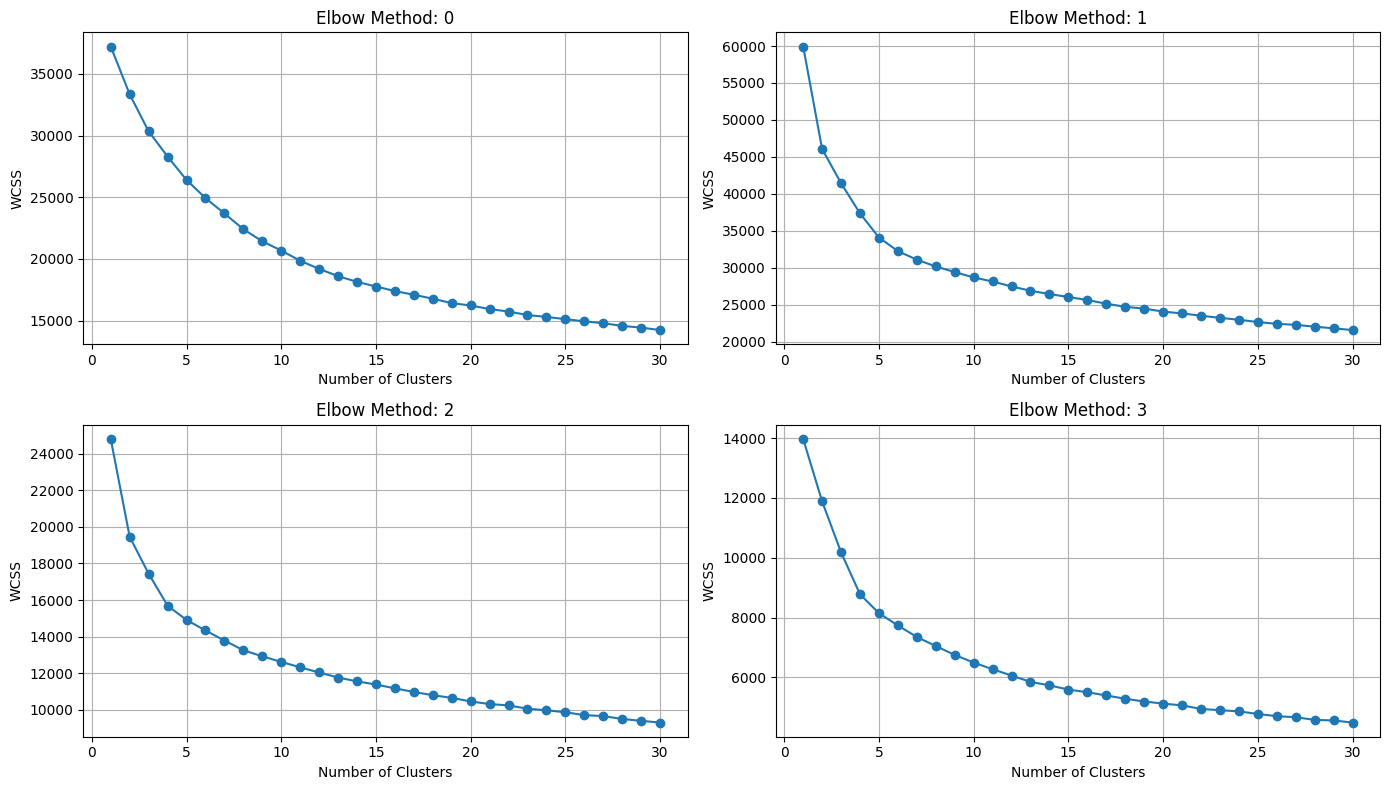

In [87]:
import math
num_emotions = len(emotion_list)
cols = 2
rows = math.ceil(num_emotions / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axs = axs.flatten()  # Flatten in case of single row

for i, emotion in enumerate(emotion_list):
    print(f"Testing label={emotion}")
    emotion_indices = df_with_lyrics[df_with_lyrics['labels'] == emotion].index
    emotion_data = less_lyrics_scaled_df.loc[emotion_indices]

    means, inertias = optimise_k_means(emotion_data, 30)

    axs[i].plot(means, inertias, 'o-')
    axs[i].set_title(f'Elbow Method: {emotion}')
    axs[i].set_xlabel('Number of Clusters')
    axs[i].set_ylabel('WCSS')
    axs[i].grid(True)

# Hide any unused subplots if number of emotions is odd
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [88]:
def k_score(data, max_k):
    scores = []
    means = []
    inertias = []

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        labels = kmeans.fit_predict(data)

        score = silhouette_score(data, labels)
        scores.append(score)
    return scores

In [89]:
emotion_scores = {}

for emotion in emotion_list:
    emotion_indices = df_with_lyrics[df_with_lyrics['labels'] == emotion].index
    emotion_data = less_lyrics_scaled_df.loc[emotion_indices]
    print(f"Processing emotion: {emotion}")
    scores = k_score(emotion_data, 30)
    emotion_scores[emotion] = scores

Processing emotion: 0
Processing emotion: 1
Processing emotion: 2
Processing emotion: 3


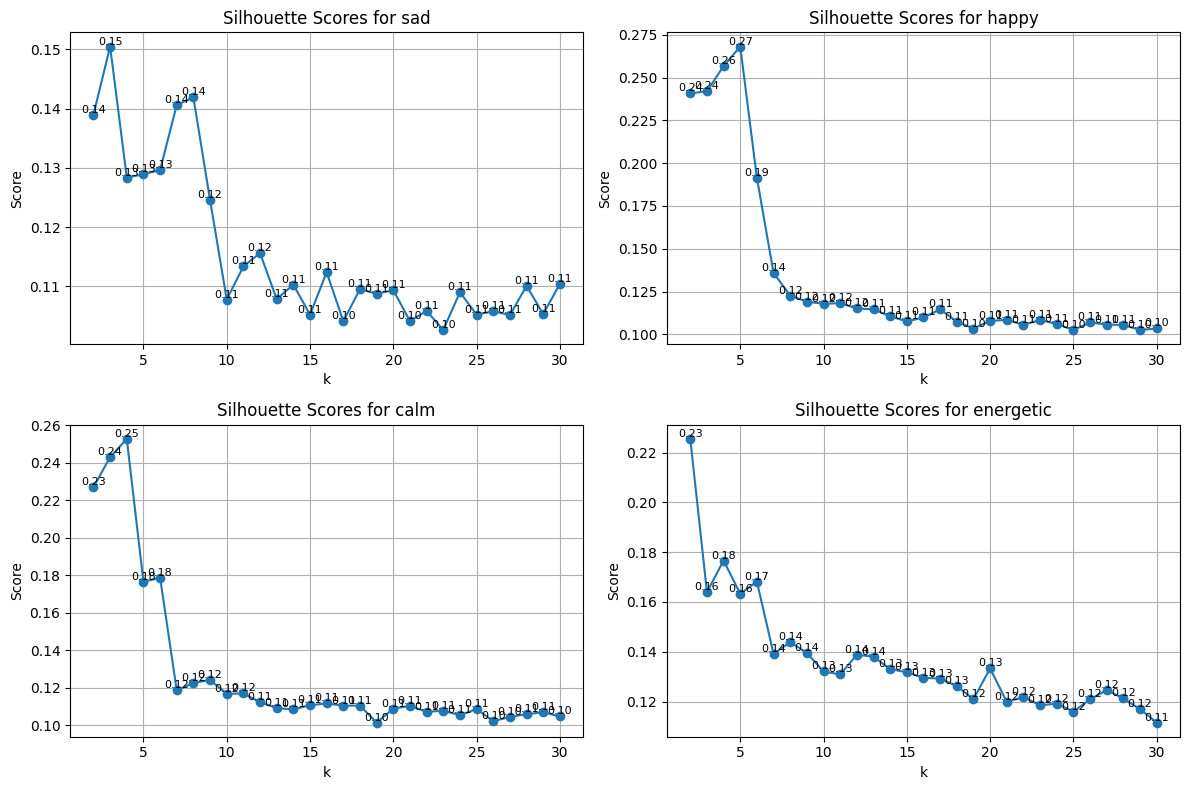

In [90]:
num_emotions = len(emotion_scores)
cols = 2
rows = math.ceil(num_emotions / cols)

plt.figure(figsize=(12, rows * 4))

for i, (emotion, scores) in enumerate(emotion_scores.items()):
    k_values = range(2, 2 + len(scores))
    
    plt.subplot(rows, cols, i + 1)
    plt.plot(k_values, scores, marker='o')
    plt.title(f'Silhouette Scores for {emotion_dict[emotion]}')
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.grid(True)

    # Annotate each point with its score
    for k, score in zip(k_values, scores):
        plt.text(k, score, f"{score:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [91]:
num_cluster = [8,5,4,4]

Processing emotion: 0 with k=8
Processing emotion: 1 with k=5
Processing emotion: 2 with k=4
Processing emotion: 3 with k=4


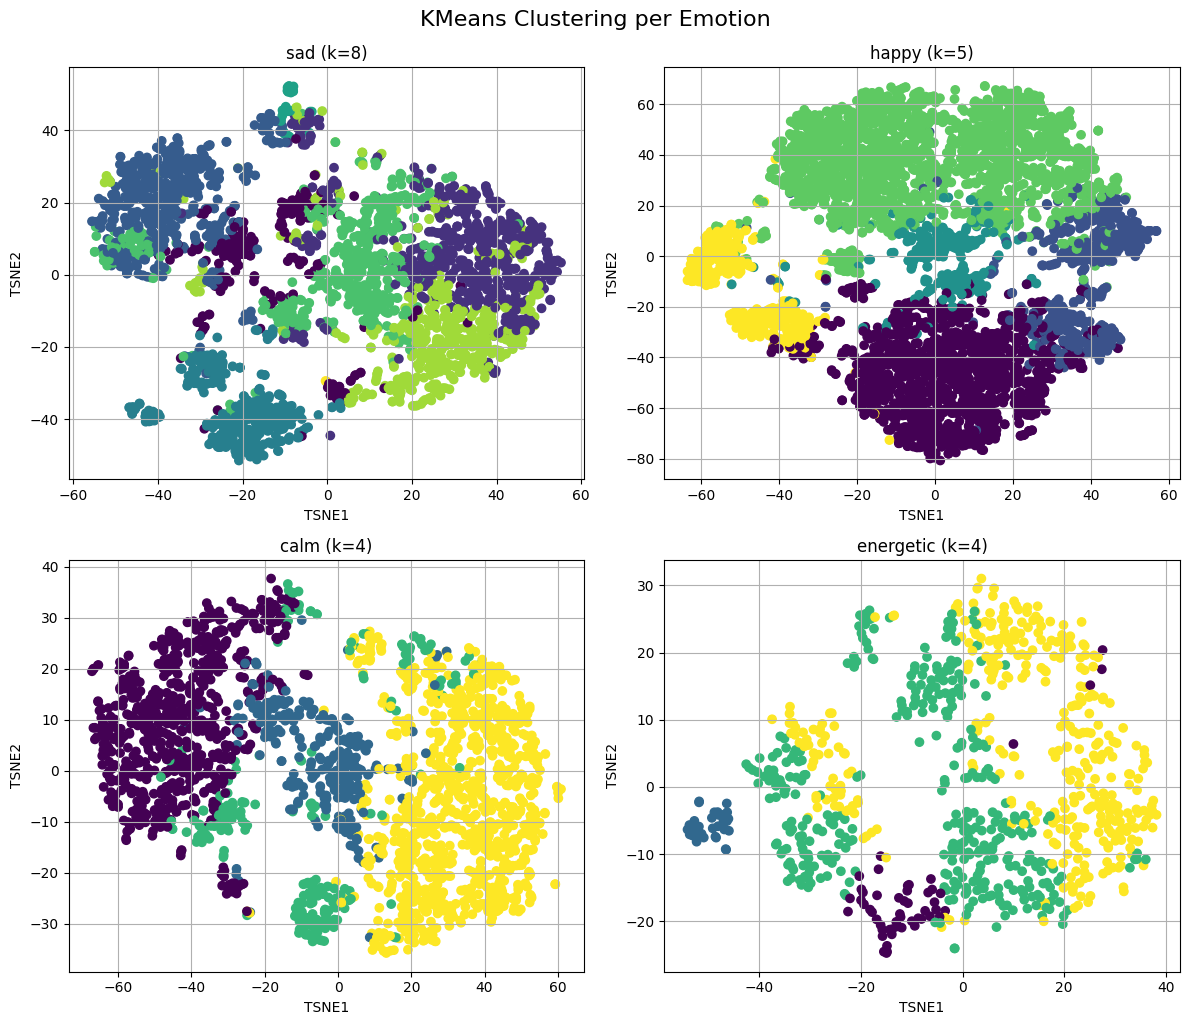

In [92]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10)) 
axs = axs.flatten()

for i, (emotion, ax) in enumerate(zip(emotion_list, axs), start=2):  # Start from k=2
    print(f"Processing emotion: {emotion} with k={num_cluster[i-2]}")

    emotion_indices = df_with_lyrics[df_with_lyrics['labels'] == emotion].index
    emotion_data = less_lyrics_scaled_df.loc[emotion_indices].drop(columns='Cluster', errors='ignore')

    kmeans = KMeans(n_clusters=num_cluster[i-2], n_init='auto', random_state=42)
    kmeans.fit(emotion_data)

    df_with_lyrics.loc[emotion_indices, 'Cluster'] = kmeans.labels_
    less_lyrics_scaled_df.loc[emotion_indices, 'Cluster'] = kmeans.labels_

    # PCA for cluster visualization
    # pca = PCA(n_components=2)
    # reduced_features = pca.fit_transform(emotion_data)
    
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_features = tsne.fit_transform(emotion_data)

    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_)
    ax.set_title(f'{emotion_dict[emotion]} (k={num_cluster[i-2]})')
    ax.set_xlabel('TSNE1')
    ax.set_ylabel('TSNE2')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.suptitle('KMeans Clustering per Emotion', fontsize=16, y=1.02)
plt.show()


### PCA to improve clustering

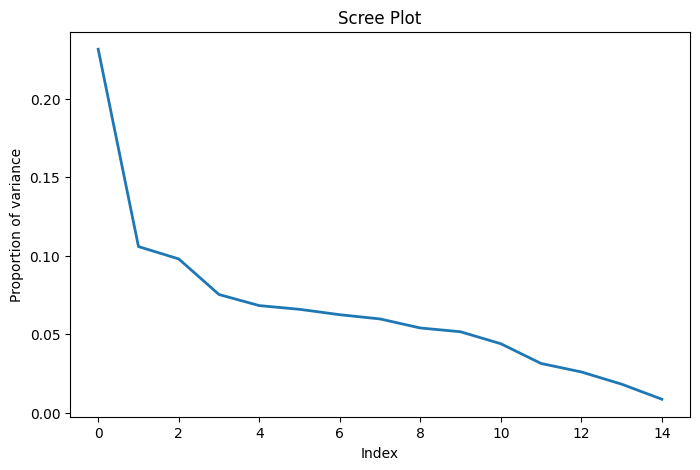

In [93]:
# finding the ideal value for n_components
corr_matrix = less_lyrics_scaled_df.corr()
eigen_vals, eigen_vecs = np.linalg.eig(corr_matrix)
corr_order = np.argsort(eigen_vals)[::-1]
corr_eigenval_sorted = eigen_vals[corr_order]
corr_eigenvec_sorted = eigen_vecs[:, corr_order]
PVE = corr_eigenval_sorted / np.sum(corr_eigenval_sorted)

fig = plt.figure(figsize=(8,5))

plt.plot(PVE, linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Index")
plt.ylabel("Proportion of variance")
plt.show()
plt.close("all")

In [95]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(less_lyrics_scaled_df)
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
pca_df.reset_index(drop=True, inplace=True)

Testing label=0
Testing label=1
Testing label=2
Testing label=3


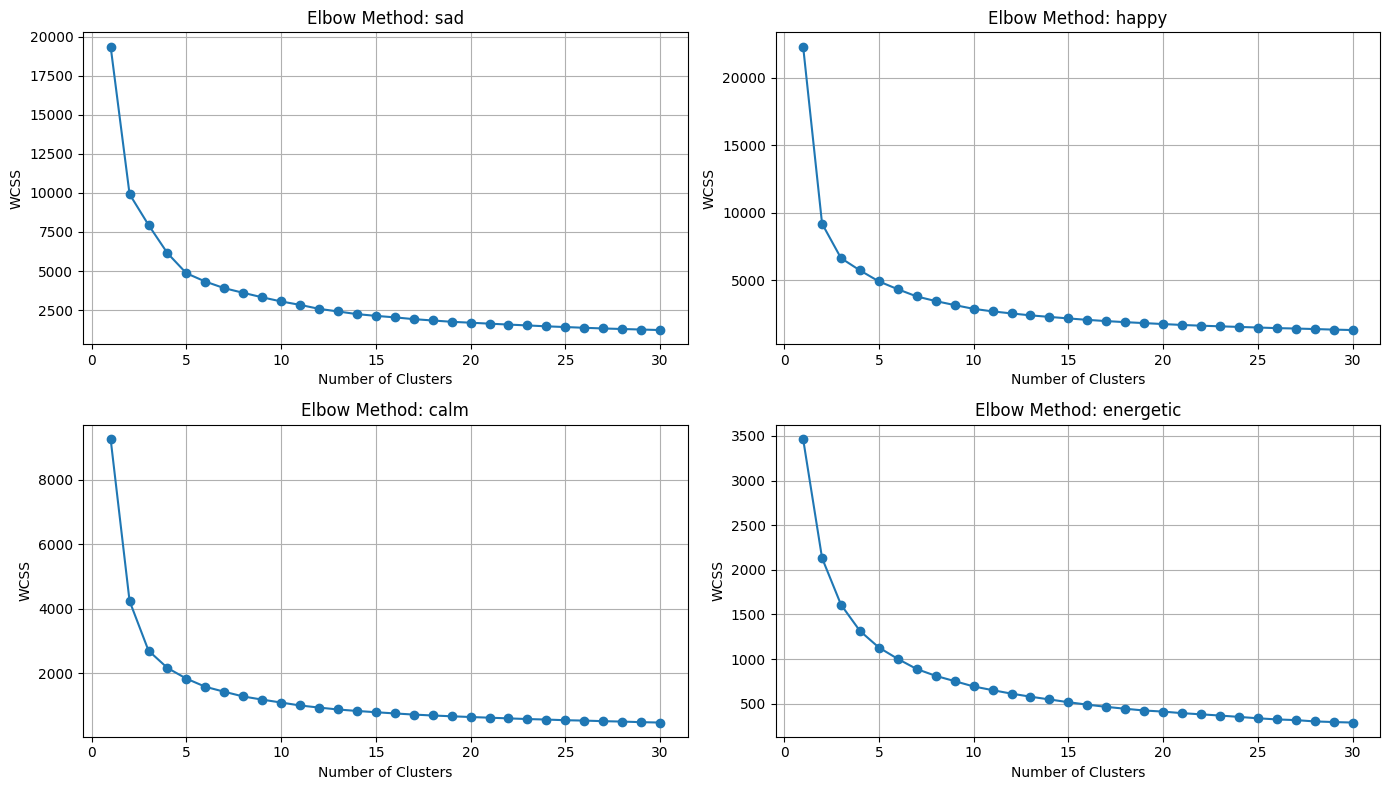

In [96]:
import math
num_emotions = len(emotion_list)
cols = 2
rows = math.ceil(num_emotions / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axs = axs.flatten()  # Flatten in case of single row

for i, emotion in enumerate(emotion_list):
    print(f"Testing label={emotion}")
    emotion_indices = df_with_lyrics[df_with_lyrics['labels'] == emotion].index
    emotion_data = pca_df.loc[emotion_indices]

    means, inertias = optimise_k_means(emotion_data, 30)

    axs[i].plot(means, inertias, 'o-')
    axs[i].set_title(f'Elbow Method: {emotion_dict[emotion]}')
    axs[i].set_xlabel('Number of Clusters')
    axs[i].set_ylabel('WCSS')
    axs[i].grid(True)

# Hide any unused subplots if number of emotions is odd
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [97]:
emotion_scores = {}

for emotion in emotion_list:
    emotion_indices = df_with_lyrics[df_with_lyrics['labels'] == emotion].index
    emotion_data = pca_df.loc[emotion_indices]
    print(f"Processing emotion: {emotion}")
    scores = k_score(emotion_data, 30)
    emotion_scores[emotion] = scores

Processing emotion: 0
Processing emotion: 1
Processing emotion: 2
Processing emotion: 3


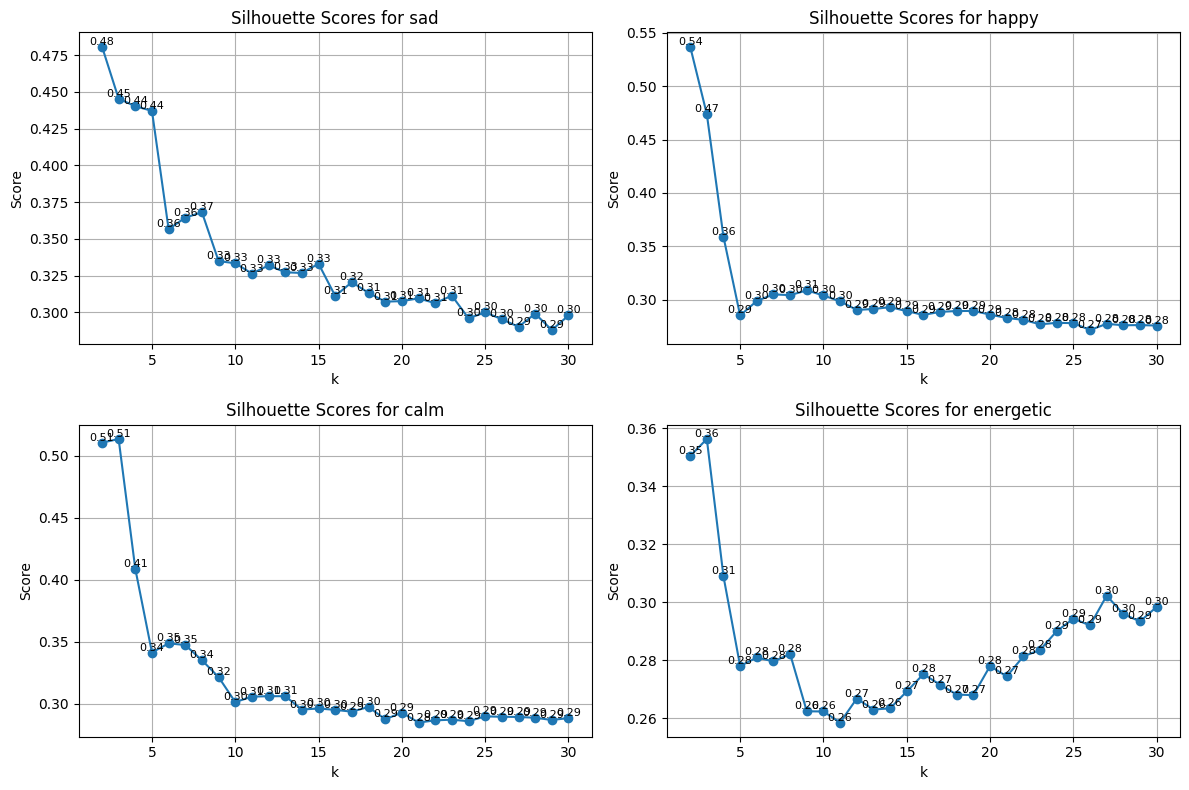

In [98]:
num_emotions = len(emotion_scores)
cols = 2
rows = math.ceil(num_emotions / cols)

plt.figure(figsize=(12, rows * 4))

for i, (emotion, scores) in enumerate(emotion_scores.items()):
    k_values = range(2, 2 + len(scores))
    
    plt.subplot(rows, cols, i + 1)
    plt.plot(k_values, scores, marker='o')
    plt.title(f'Silhouette Scores for {emotion_dict[emotion]}')
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.grid(True)

    # Annotate each point with its score
    for k, score in zip(k_values, scores):
        plt.text(k, score, f"{score:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [103]:
# 2 pc
# num_cluster = [6,4,5,9]
# 3 pc
num_cluster = [8,4,6,4]

Processing emotion: 0 with k=8
Processing emotion: 1 with k=4
Processing emotion: 2 with k=6
Processing emotion: 3 with k=4


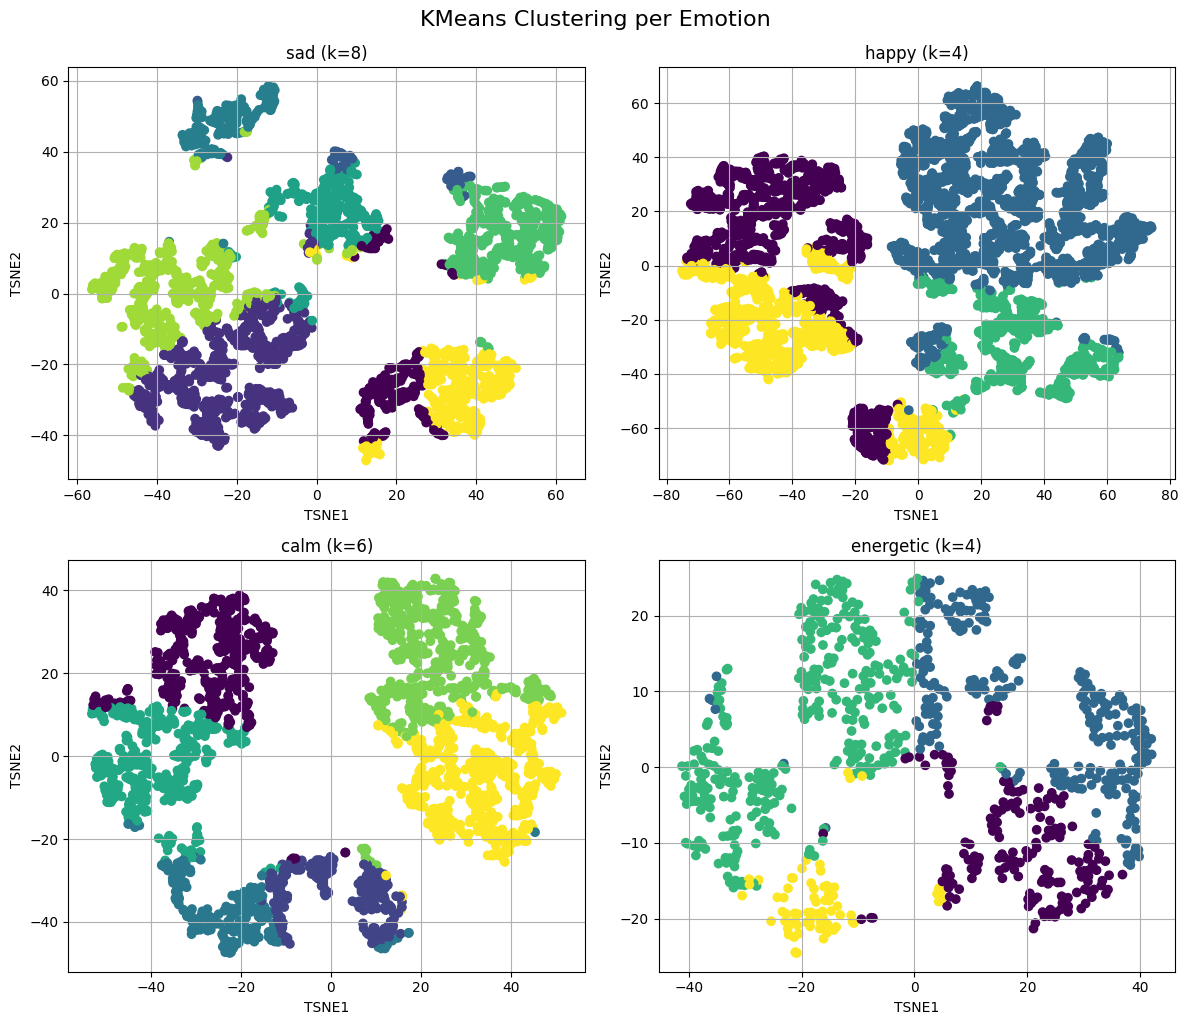

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10)) 
axs = axs.flatten()

for i, (emotion, ax) in enumerate(zip(emotion_list, axs), start=2):  # Start from k=2
    print(f"Processing emotion: {emotion} with k={num_cluster[i-2]}")

    emotion_indices = df_with_lyrics[df_with_lyrics['labels'] == emotion].index
    emotion_data = pca_df.loc[emotion_indices].drop(columns='Cluster', errors='ignore')

    kmeans = KMeans(n_clusters=num_cluster[i-2], n_init='auto', random_state=42)
    kmeans.fit(emotion_data)

    df_with_lyrics.loc[emotion_indices, 'Cluster'] = kmeans.labels_
    pca_df.loc[emotion_indices, 'Cluster'] = kmeans.labels_

    # PCA for cluster visualization
    # pca = PCA(n_components=2)
    # reduced_features = pca.fit_transform(emotion_data)
    
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_features = tsne.fit_transform(emotion_data)

    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_)
    ax.set_title(f'{emotion_dict[emotion]} (k={num_cluster[i-2]})')
    ax.set_xlabel('TSNE1')
    ax.set_ylabel('TSNE2')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.suptitle('KMeans Clustering per Emotion', fontsize=16, y=1.02)
plt.show()


In [122]:
def find_song_recommendation(track_name, artist_name, df):
    try:
        track_index = df[(df['track_name'].str.lower() == track_name.lower()) & (df['artist_name'].str.lower() == artist_name.lower())].index[0]
    except IndexError:
        print('Track name does not exist in the dataset')
        return None

    cluster = df.loc[track_index]['Cluster']
    emotion = df.loc[track_index]['labels']

    filter = ((df['Cluster'] == cluster) & (df['labels'] == emotion))

    filtered_df = df[filter]

    for i in range(5):
        recommendation = filtered_df.sample()
        print(f"Song: {recommendation.iloc[0]['track_name']} | Artist: {recommendation.iloc[0]['artist_name']}")

In [127]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
find_song_recommendation(song_name, artist_name, df_with_lyrics)

Enter song name,artist name:  i won't give up,jason mraz


Song: In the Woods Somewhere | Artist: Hozier
Song: Snowing | Artist: Henrik Janson
Song: Boneyard - Edit | Artist: Fink
Song: Never Seen Anything "Quite Like You" - Acoustic | Artist: The Script
Song: New York, New York | Artist: Spritely


# K Nearest Neighbors

In [110]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']


In [111]:
knn = NearestNeighbors(n_neighbors=6, metric='cosine')
df_audio_features= less_lyrics_scaled_df[audio_features]
knn.fit(less_lyrics_scaled_df[audio_features])

NearestNeighbors(metric='cosine', n_neighbors=6)

In [112]:
def recommend_similar_songs(song_name, scaled_df, full_df):
  try:
    track_index = full_df[full_df['track_name'].str.lower() == song_name.lower()].index[0]
  except IndexError:
    return None
  song_row = scaled_df.iloc[track_index]
  song_vector = song_row[audio_features].values.reshape(1,-1) #  get numpy array of audio features
  distances, indices = knn.kneighbors(song_vector)
  similar_songs_idx = scaled_df.iloc[indices[0][1:]].index
  return full_df.loc[similar_songs_idx][['track_name', 'artist_name']]

In [113]:
generate_rec = recommend_similar_songs('I won\'t give up', less_lyrics_scaled_df, df_with_lyrics)
generate_rec.head(5)

C:\Users\Yun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,track_name,artist_name
1057,Say Something,A Great Big World
5809,"Girl Crush - Recorded at Metropolis Studios, L...",Harry Styles
1821,I'll Be Good,Jaymes Young
7968,K.,Rosie Carney
9592,Golden (Acoustic),Becca Mancari


In [114]:
def recommend_similar_songs(song_name, artist_name, scaled_df, full_df, audio_features, all_lyrics_embeddings, all_description_embeddings, num_recommendations=6):
    try:

        track_index = full_df[(full_df['track_name'].str.lower() == song_name.lower()) & (full_df['artist_name'].str.lower() == artist_name.lower())].index[0]
    except IndexError:
        print(f"'{song_name}' not found in dataset.")
        return None

    song_row = scaled_df.loc[track_index]
    song_audio_vector = song_row[audio_features].values.reshape(1, -1)

    lyrics = full_df.loc[track_index, 'lyrics']  
    lyrics_embedding = get_embedding(lyrics).reshape(1, -1)

    desc = full_df.loc[track_index, 'description']  
    desc_embedding = get_embedding(desc).reshape(1, -1)

    combined_song_features = np.hstack((song_audio_vector, lyrics_embedding, desc_embedding))  

    # print('Training KNN model with combined features (audio + lyrics + description)')

    audio_features_data = scaled_df[audio_features].values  

    combined_features = np.hstack((audio_features_data, all_lyrics_embeddings, all_description_embeddings))

    knn_model = NearestNeighbors(n_neighbors=num_recommendations + 1, metric='cosine')
    knn_model.fit(combined_features)

    # print('Finding similar songs based on combined features')

    distances, indices = knn_model.kneighbors(combined_song_features, n_neighbors=num_recommendations + 1)

    similar_songs_idx = scaled_df.iloc[indices[0][1:]].index

    print('Top Recommended Songs:')
    for i, index in enumerate(indices[0][1:]):  
        song_name = full_df.loc[index, 'track_name']
        artist_name = full_df.loc[index, 'artist_name']
        combined_similarity = 1 - distances[0][i + 1]  
        print(f"Song: {song_name} | Artist: {artist_name} | Combined Similarity: {combined_similarity:.3f}")

    recommended_songs = full_df.iloc[similar_songs_idx][['track_name', 'artist_name', 'lyrics']]

    return recommended_songs


In [115]:
def recommend_similar_songs_with_emotion(song_name, artist_name, scaled_df, full_df, audio_features,
                                         all_lyrics_embeddings, all_description_embeddings, num_recommendations=6):
    try:
        track_index = full_df[
            (full_df['track_name'].str.lower() == song_name.lower()) &
            (full_df['artist_name'].str.lower() == artist_name.lower())
        ].index[0]
    except IndexError:
        print(f"'{song_name}' by '{artist_name}' not found in dataset.")
        return None

    # Get emotion label of the input song
    input_emotion = full_df.loc[track_index, 'labels']

    # Filter datasets based on emotion (preserve indices)
    condition = full_df['labels'] == input_emotion
    filtered_full_df = full_df[condition]
    filtered_scaled_df = scaled_df.loc[condition]
    filtered_lyrics_embeddings = all_lyrics_embeddings[condition]
    filtered_description_embeddings = all_description_embeddings[condition]

    # Get features for the input song
    song_row = scaled_df.loc[track_index]
    song_audio_vector = song_row[audio_features].values.reshape(1, -1)

    lyrics = full_df.loc[track_index, 'lyrics']
    lyrics_embedding = get_embedding(lyrics).reshape(1, -1)

    desc = full_df.loc[track_index, 'description']
    desc_embedding = get_embedding(desc).reshape(1, -1)

    combined_song_features = np.hstack((song_audio_vector, lyrics_embedding, desc_embedding))

    # Prepare combined features for KNN
    combined_features = np.hstack((
        filtered_scaled_df[audio_features].values,
        filtered_lyrics_embeddings,
        filtered_description_embeddings
    ))

    knn_model = NearestNeighbors(n_neighbors=num_recommendations + 1, metric='cosine')
    knn_model.fit(combined_features)

    distances, indices = knn_model.kneighbors(combined_song_features)

    # Get original indices of similar songs
    filtered_indices = filtered_scaled_df.iloc[indices[0][1:]].index
    print(f"Top Recommended Songs (Emotion: {input_emotion}):")
    for i, idx in enumerate(filtered_indices):
        song_name_rec = full_df.loc[idx, 'track_name']
        artist_name_rec = full_df.loc[idx, 'artist_name']
        similarity_score = 1 - distances[0][i + 1]
        print(f"Song: {song_name_rec} | Artist: {artist_name_rec} | Combined Similarity: {similarity_score:.3f}")

    recommended_songs = full_df.loc[filtered_indices][['track_name', 'artist_name', 'lyrics']]
    return recommended_songs


Generate 4 recommendations based on cosine similarity in audio features and meaning behind lyrics

In [116]:
# generate_rec = recommend_similar_songs('Love Someone', less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

In [117]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

Enter song name,artist name:  i won't give up,jason mraz


Top Recommended Songs:
Song: Girl Crush - Recorded at Metropolis Studios, London | Artist: Harry Styles | Combined Similarity: 0.921
Song: Say Something | Artist: A Great Big World | Combined Similarity: 0.904
Song: I'll Be Good | Artist: Jaymes Young | Combined Similarity: 0.889
Song: Cover Me Up | Artist: Jason Isbell | Combined Similarity: 0.882
Song: Iris | Artist: Kina Grannis | Combined Similarity: 0.875
Song: Like I'm Gonna Lose You | Artist: Jasmine Thompson | Combined Similarity: 0.873


In [118]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs_with_emotion(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

Enter song name,artist name:  i won't give up,jason mraz


Top Recommended Songs (Emotion: 0):
Song: Girl Crush - Recorded at Metropolis Studios, London | Artist: Harry Styles | Combined Similarity: 0.921
Song: Say Something | Artist: A Great Big World | Combined Similarity: 0.904
Song: I'll Be Good | Artist: Jaymes Young | Combined Similarity: 0.889
Song: Cover Me Up | Artist: Jason Isbell | Combined Similarity: 0.882
Song: Iris | Artist: Kina Grannis | Combined Similarity: 0.875
Song: Like I'm Gonna Lose You | Artist: Jasmine Thompson | Combined Similarity: 0.873


In [ ]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

In [ ]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs_with_emotion(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

Using text prompt

In [ ]:
df_with_lyrics.head(5)

In [ ]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

In [ ]:
def recommend_music_using_prompt(df, user_text_embedding, lyrics_embeddings, num_recommendations=5):
    # Compute the cosine similarity between the user's input and each song's lyrics embedding
    similarities = [cosine_similarity([user_text_embedding], [lyrics_embedding])[0][0] for lyrics_embedding in lyrics_embeddings]
    
    # Now, we'll rank the songs by similarity without modifying the dataframe
    # Sort by similarity score in descending order and get the top recommendations
    sorted_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:num_recommendations]
    
    # Display the sorted songs with their similarity scores
    for idx in sorted_indices:
        print(f"Song: {df['track_name'][idx]}, Artist: {df['artist_name'][idx]}, Similarity: {similarities[idx]:.3f}")


In [ ]:
def recommend_music_using_knn(df, user_text_embedding, lyrics_embeddings, num_recommendations=5):

    knn_model = NearestNeighbors(n_neighbors=num_recommendations, metric='cosine')
    knn_model.fit(lyrics_embeddings)

    distances, indices = knn_model.kneighbors([user_text_embedding], n_neighbors=num_recommendations)

    print(f"Top {num_recommendations} Recommended Songs:")
    for i, idx in enumerate(indices[0][1:]): 
        song_name = df['track_name'].iloc[idx]
        artist_name = df['artist_name'].iloc[idx]
        similarity_score = 1 - distances[0][i + 1] 
        print(f"Song: {song_name}, Artist: {artist_name}, Similarity: {similarity_score:.3f}")

In [ ]:
user_prompt= "I miss my old home and childhood memories"
user_text_embedding = model.encode(user_prompt)

In [ ]:
user_text_embedding.size

In [ ]:
all_lyrics_embeddings.shape

In [ ]:
recommend_music_using_prompt(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

In [ ]:
user_prompt2= "I need something energetic to work out to."
user_text_embedding2 = model.encode(user_prompt2)

In [ ]:
recommend_music_using_knn(df_with_lyrics, user_text_embedding2, all_lyrics_embeddings)

In [ ]:
user_prompt3 = "Today I felt really down after a hard day at work. I just wanted to relax and listen to something calming but with a little energy, something that makes me feel like I’m not alone."
user_text_embedding3 = model.encode(user_prompt3)
recommend_music_using_prompt(df_with_lyrics, user_text_embedding3, all_lyrics_embeddings)

In [ ]:
user_prompt4 = "Today was one of those days where everything seemed to be moving too fast. I woke up late, rushed through breakfast, and barely made it to work on time. The whole day felt like I was running on autopilot—meetings, emails, deadlines... everything was just piling up. By the time I got home, I was exhausted, but I knew I needed to unwind before I could even think about going to bed.I decided to go for a walk to clear my head. The fresh air helped a little, but I was still carrying the weight of the day with me. I felt a little disconnected, like I was physically present but mentally somewhere else. I wanted to listen to music that matched how I felt—something that was a little melancholic but also had a sense of hope. I wanted to feel like I wasn't the only one struggling, but I also needed something to remind me that there’s light at the end of the tunnel. I guess I’m craving a mix of calmness and energy, something that’s soothing but also gives me a little boost. It’s a weird balance—feeling both drained and needing to feel alive again."
user_text_embedding4 = model.encode(user_prompt4)
recommend_music_using_prompt(df_with_lyrics, user_text_embedding4, all_lyrics_embeddings)

In [ ]:
recommend_music_using_knn(df, user_text_embedding3, all_lyrics_embeddings)

In [ ]:
test_prompt = input("Enter text:")
user_text_embedding = model.encode(test_prompt)
recommend_music_using_prompt(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

In [ ]:
test_prompt = input("Enter text:")
user_text_embedding = model.encode(test_prompt)
recommend_music_using_knn(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

In [ ]:
test_prompt = input("Enter text:")
user_text_embedding = model.encode(test_prompt)
recommend_music_using_knn(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)